In [53]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly

%matplotlib inline

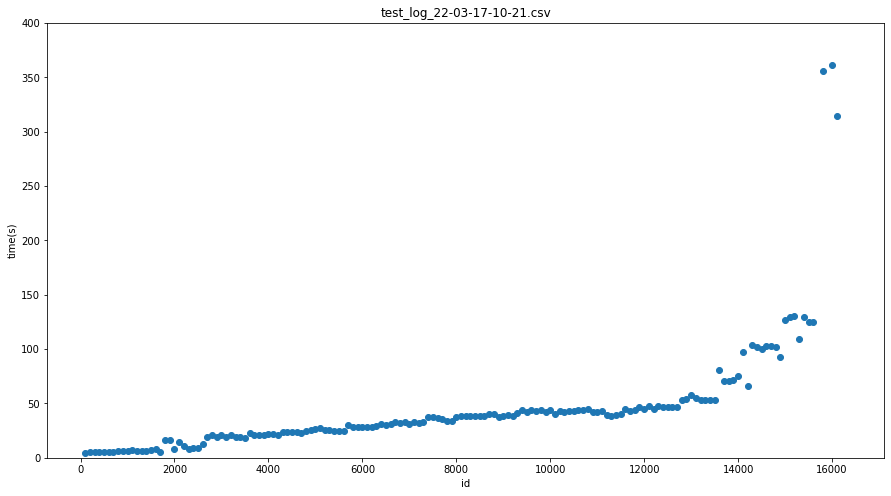

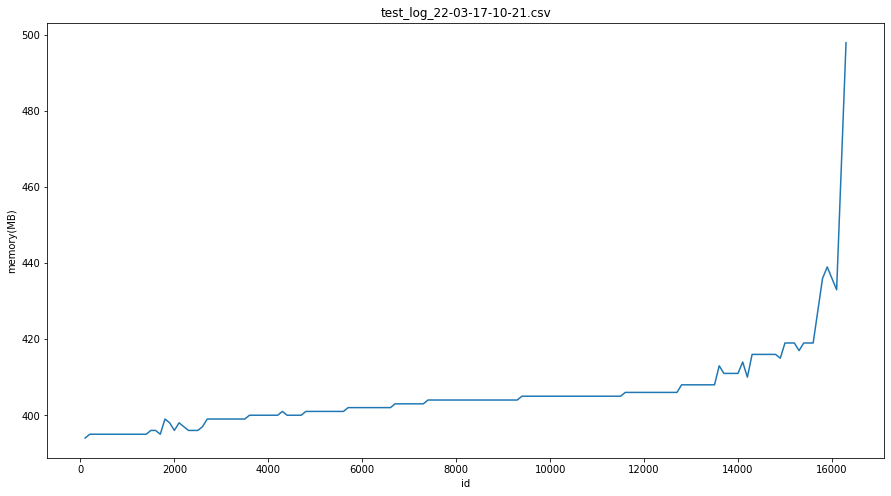

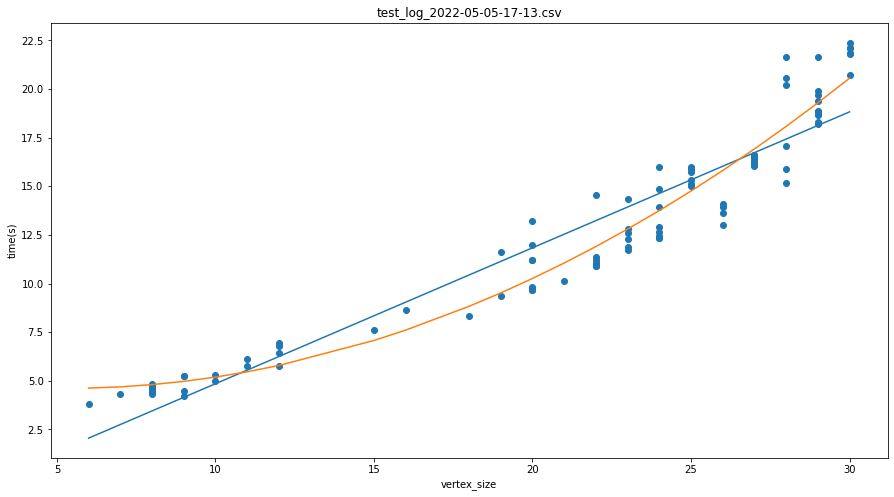

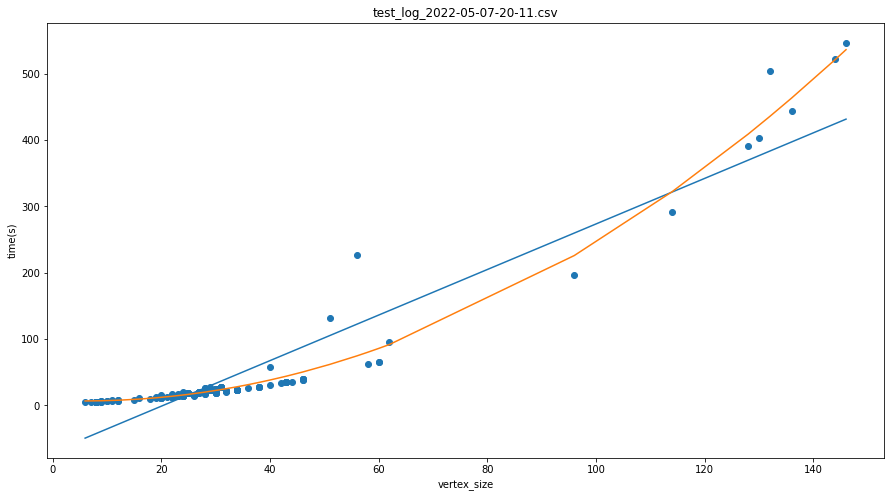

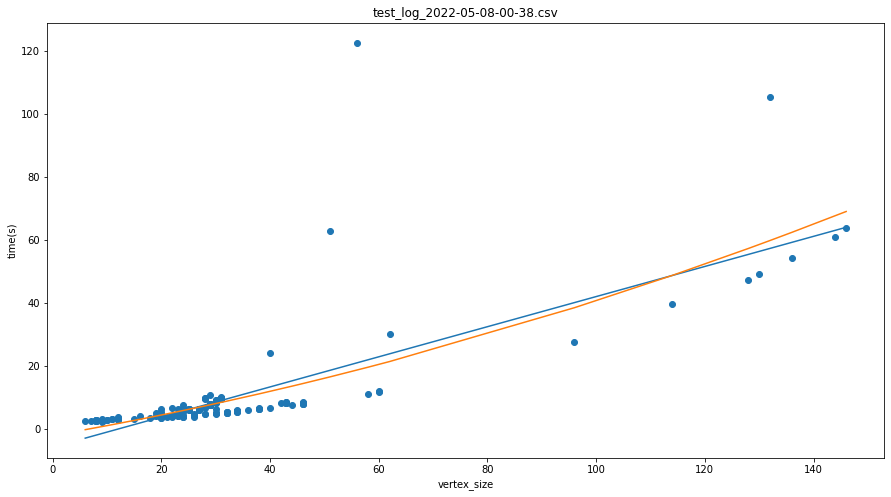

In [58]:
tests = []

for filename in os.listdir(os.getcwd() + "/tests"):
    match = re.search("\.csv$", filename)
    if match:
        tests.append(filename)

df = pd.read_csv(os.getcwd() + "/tests/" + tests[0])



plt.figure(figsize=(15,8))
plt.scatter(df['id'], df['time(s)'])
plt.xlabel('id')
plt.ylabel('time(s)')
plt.ylim([0, 400])
plt.title(tests[0])
plt.show()

plt.figure(figsize=(15,8))
plt.plot(df['id'], df['memory(MB)'])
plt.xlabel('id')
plt.ylabel('memory(MB)')
plt.title(tests[0])
plt.show()

for test in tests[1:]:
    df = pd.read_csv(os.getcwd() + "/tests/" + test)
    df = df.sort_values(by='vertex_size')

    x = df['vertex_size']
    y = df['time']

    # Fit a polynomial to the data
    p_1 = poly.polyfit(x, y, 1)
    lin_y = poly.polyval(x, p_1)
    p_2 = poly.polyfit(x, y, 2)
    quad_y = poly.polyval(x, p_2)

    plt.figure(figsize=(15,8))
    plt.scatter(x, y)
    plt.plot(x, quad_y)
    plt.xlabel('vertex_size')
    plt.ylabel('time(s)')
    plt.title(test)
    plt.show()